In [1]:
###################################################################################################
# Project: 
#          
# Lenguaje: Python / jupyter
# Description:
#
# References: 
# Git Control:https://github.com/camiloblanco/BlackScholesDL
# Author - Year:Camilo Blanco Vargas - 2020
# Mail - Web:mail@camiloblanco.com - www.camiloblanco.com
###################################################################################################

In [2]:
# Import the necesary libraries
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from pickle import dump
import keras
import keras.backend as kb
import tensorflow as tf

#Using Nvidia GPU card
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
#https://stackoverflow.com/questions/43990046/tensorflow-blas-gemm-launch-failed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


Using TensorFlow backend.


True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


In [3]:
# Read datset 01 from file
data_file_01='SPX500_H4_MLR_DATASET_01_train.xlsx'
df_train = pd.read_excel(data_file_01)

# Display the head of the dataset
df_train.head()

,sample,time,price,return,direction,SMA_14,SMA_21,SMA_40,Slope_540,Buy_prev,Wait_prev,Sell_prev,Buy,Wait,Sell
0,540,2003-09-02 09:00:00,1011.8,0.000198,1,1003.735714,1000.995238,998.3600,0.239943,0,1,0,0,1,0
1,541,2003-09-02 13:00:00,1013.8,0.001977,1,1004.942857,1001.842857,998.6475,0.239702,0,1,0,0,1,0
2,542,2003-09-02 17:00:00,1022.6,0.008680,1,1006.685714,1003.171429,999.2000,0.239304,0,1,0,0,1,0
3,543,2003-09-02 21:00:00,1023.3,0.000685,1,1008.478571,1004.509524,999.7375,0.238880,0,1,0,0,0,1
4,544,2003-09-03 01:00:00,1021.6,-0.001661,-1,1009.935714,1005.709524,1000.0200,0.238203,0,0,1,1,0,0


In [4]:
#Clean the data
# Drop unused columns
df_train.drop(df_train.columns[1], axis=1, inplace=True)
df_train.head()

,sample,price,return,direction,SMA_14,SMA_21,SMA_40,Slope_540,Buy_prev,Wait_prev,Sell_prev,Buy,Wait,Sell
0,540,1011.8,0.000198,1,1003.735714,1000.995238,998.3600,0.239943,0,1,0,0,1,0
1,541,1013.8,0.001977,1,1004.942857,1001.842857,998.6475,0.239702,0,1,0,0,1,0
2,542,1022.6,0.008680,1,1006.685714,1003.171429,999.2000,0.239304,0,1,0,0,1,0
3,543,1023.3,0.000685,1,1008.478571,1004.509524,999.7375,0.238880,0,1,0,0,0,1
4,544,1021.6,-0.001661,-1,1009.935714,1005.709524,1000.0200,0.238203,0,0,1,1,0,0


In [5]:
# Describe 
train_stats = df_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
sample,26152.0,13615.500000,7549.576456,540.000000,7077.750000,13615.500000,20153.250000,26691.000000
price,26152.0,1725.093507,651.342782,675.000000,1209.875000,1444.700000,2112.600000,3539.600000
return,26152.0,0.000059,0.004766,-0.068837,-0.001281,0.000096,0.001592,0.108578
direction,26152.0,0.049442,0.982332,-1.000000,-1.000000,1.000000,1.000000,1.000000
SMA_14,26152.0,1724.469660,650.720340,683.778571,1208.519643,1444.407143,2111.358929,3513.678571
SMA_21,26152.0,1724.133798,650.394776,686.880952,1208.401190,1444.204762,2111.088095,3507.152381
SMA_40,26152.0,1723.229864,649.533398,696.667500,1207.341875,1444.065000,2108.479375,3480.800000
Slope_540,26152.0,0.083422,0.314941,-1.589300,-0.030455,0.135317,0.243311,1.476230
Buy_prev,26152.0,0.063819,0.244435,0.000000,0.000000,0.000000,0.000000,1.000000
Wait_prev,26152.0,0.872362,0.333693,0.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Read datset 02 from excel file
data_file_02='SPX500_H4_MLR_DATASET_01_validate.xlsx'
df_validate = pd.read_excel(data_file_02)
# Display the head of the dataset
df_validate.head()

,sample,time,price,return,direction,SMA_14,SMA_21,SMA_40,Slope_540,Buy_prev,Wait_prev,Sell_prev,Buy,Wait,Sell
0,26692,2020-09-02 01:00:00,3538.4,-0.000339,-1,3515.771429,3510.285714,3483.6450,1.113439,0,0,1,0,1,0
1,26693,2020-09-02 05:00:00,3553.9,0.004381,1,3517.828571,3513.285714,3487.0075,1.116068,0,1,0,0,1,0
2,26694,2020-09-02 09:00:00,3548.6,-0.001491,-1,3519.650000,3516.014286,3489.9675,1.119038,0,1,0,0,1,0
3,26695,2020-09-02 13:00:00,3557.4,0.002480,1,3522.364286,3518.285714,3492.8650,1.122001,0,1,0,0,1,0
4,26696,2020-09-02 17:00:00,3579.1,0.006100,1,3527.328571,3522.085714,3496.1900,1.125901,0,1,0,0,1,0


In [7]:
#Clean the data
# Drop unused columns
df_validate.drop(df_validate.columns[1], axis=1, inplace=True)
df_validate.head()

,sample,price,return,direction,SMA_14,SMA_21,SMA_40,Slope_540,Buy_prev,Wait_prev,Sell_prev,Buy,Wait,Sell
0,26692,3538.4,-0.000339,-1,3515.771429,3510.285714,3483.6450,1.113439,0,0,1,0,1,0
1,26693,3553.9,0.004381,1,3517.828571,3513.285714,3487.0075,1.116068,0,1,0,0,1,0
2,26694,3548.6,-0.001491,-1,3519.650000,3516.014286,3489.9675,1.119038,0,1,0,0,1,0
3,26695,3557.4,0.002480,1,3522.364286,3518.285714,3492.8650,1.122001,0,1,0,0,1,0
4,26696,3579.1,0.006100,1,3527.328571,3522.085714,3496.1900,1.125901,0,1,0,0,1,0


In [8]:
# Describe 
validate_stats = df_validate.describe()
validate_stats = validate_stats.transpose()
validate_stats

,count,mean,std,min,25%,50%,75%,max
sample,1135.0,27259.000000,327.790584,26692.000000,26975.500000,27259.000000,27542.500000,27826.000000
price,1135.0,3768.822115,278.292094,3218.600000,3546.500000,3793.800000,3955.650000,4242.900000
return,1135.0,0.000162,0.004379,-0.030080,-0.001561,0.000347,0.002169,0.028647
direction,1135.0,0.103084,0.992449,-1.000000,-1.000000,1.000000,1.000000,1.000000
SMA_14,1135.0,3764.845513,275.950394,3255.457143,3533.775000,3789.171429,3946.457143,4218.028571
SMA_21,1135.0,3762.711093,274.789823,3272.171429,3522.159524,3790.076190,3940.361905,4203.671429
SMA_40,1135.0,3756.774504,271.857433,3292.520000,3496.178750,3793.857500,3937.381250,4195.292500
Slope_540,1135.0,0.756723,0.197061,0.402472,0.638154,0.751851,0.948051,1.146392
Buy_prev,1135.0,0.065198,0.246984,0.000000,0.000000,0.000000,0.000000,1.000000
Wait_prev,1135.0,0.868722,0.337852,0.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#sns.pairplot(df_train [['sample','price','return','direction','Buy','Wait','Sell']], diag_kind="kde")

In [10]:
#sns.pairplot(df_train [['SMA_14','SMA_21','SMA_40','Slope_540','Buy','Wait','Sell']], diag_kind="kde")

In [11]:
#sns.pairplot(df_train [['Buy_prev','Wait_prev','Sell_prev','Buy','Wait','Sell']], diag_kind="kde")

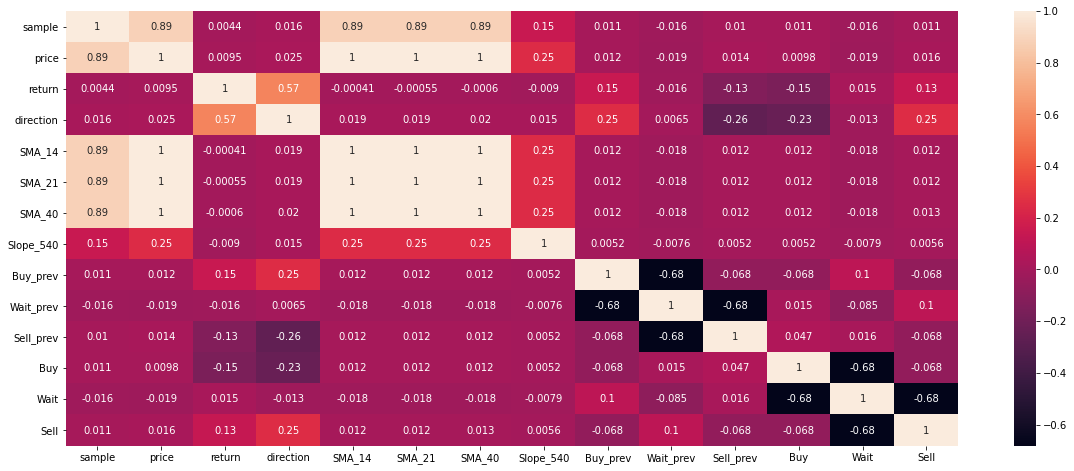

In [12]:
fig=plt.figure(figsize=(20,8))
sns.heatmap(df_train[['sample','price','return','direction','SMA_14','SMA_21','SMA_40','Slope_540','Buy_prev','Wait_prev','Sell_prev','Buy','Wait','Sell']].corr(), annot=True)
plt.show()

In [13]:
# 3. Split the dataset, Extract, Scale and Visualize

# Extract to numpy arrays
train_data=df_train.to_numpy()
validate_data=df_validate.to_numpy()
train_data_shape= train_data.shape
validate_data_shape= validate_data.shape

# Select target values or labels
y_train = train_data [:,11:14]
y_validate = validate_data[:,11:14]

# Select Feautures and scale
scaler=MinMaxScaler()
# fit scaler on the training dataset
scaler.fit(train_data[:,0:11])
# transform the training and test dataset
x_train= scaler.transform(train_data[:,0:11])
x_validate = scaler.transform(validate_data[:,0:11])
y_validate.shape


(1135, 3)

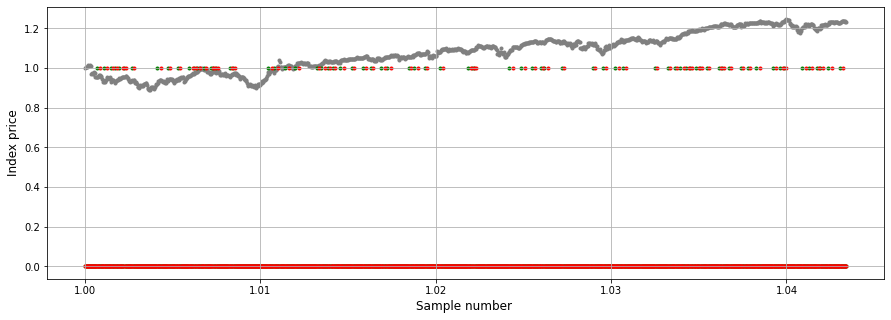

In [14]:
# Visualize index price vs sample number (time)
fig=plt.figure(figsize=(15,5))
plt.ylabel('Index price', fontsize=12)
plt.xlabel('Sample number ', fontsize=12)
plt.scatter(x_validate[:,0],x_validate[:,1],marker=".", color="gray")
plt.scatter(x_validate[:,0],y_validate[:,0],marker=".", color="green")
plt.scatter(x_validate[:,0],y_validate[:,2],marker=".", color="red")
plt.grid()
plt.show()


In [15]:
# Create and compile a neural network using Keras Sequiential method
# This model has four layers, input, output and two hidden layers
# The architectue (number of layers, activations, etc) was esstablished after many trials

model = keras.Sequential([
    
    # First layer: 
    keras.layers.Dense(600, activation='relu', input_shape=(x_train.shape[1],)),
    
    # Middle layers
    keras.layers.Dense(300, activation='relu'),
    
    # Last layer: 
    keras.layers.Dense(3, activation='sigmoid'),
])

# Compile the model, 
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=['mse','accuracy'])

# Print the model characteristics
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 600)               7200      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               180300    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 903       
Total params: 188,403
Trainable params: 188,403
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Train the neural network, and visualize errors,
# Define the epochs number for the run
EPOCHS=20
history = model.fit(x_train, y_train, validation_data=(x_validate,y_validate), epochs=EPOCHS, verbose=1)

Train on 26152 samples, validate on 1135 samples
Epoch 1/20
26152/26152 [==============================] - 2s 84us/step - loss: 0.2623 - mse: 0.0757 - accuracy: 0.9144 - val_loss: 0.2623 - val_mse: 0.0760 - val_accuracy: 0.9131
Epoch 2/20
26152/26152 [==============================] - 2s 73us/step - loss: 0.2561 - mse: 0.0744 - accuracy: 0.9149 - val_loss: 0.2615 - val_mse: 0.0756 - val_accuracy: 0.9131
Epoch 3/20
26152/26152 [==============================] - 2s 74us/step - loss: 0.2553 - mse: 0.0742 - accuracy: 0.9149 - val_loss: 0.2609 - val_mse: 0.0756 - val_accuracy: 0.9131
Epoch 4/20
26152/26152 [==============================] - 2s 75us/step - loss: 0.2545 - mse: 0.0740 - accuracy: 0.9149 - val_loss: 0.2713 - val_mse: 0.0772 - val_accuracy: 0.9131
Epoch 5/20
26152/26152 [==============================] - 2s 76us/step - loss: 0.2550 - mse: 0.0742 - accuracy: 0.9149 - val_loss: 0.2632 - val_mse: 0.0759 - val_accuracy: 0.9131
Epoch 6/20
26152/26152 [==============================] 

In [17]:
# Create a pandas DataFrame from model.fit history dictionary
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

,val_loss,val_mse,val_accuracy,loss,mse,accuracy,epoch
10,0.261496,0.075680,0.913069,0.253808,0.073927,0.914882,10
11,0.262835,0.076089,0.913069,0.253997,0.073983,0.914882,11
12,0.264408,0.076484,0.913069,0.253413,0.073844,0.914882,12
13,0.262070,0.075870,0.913069,0.253607,0.073893,0.914882,13
14,0.261581,0.075682,0.913069,0.253337,0.073827,0.914882,14
15,0.262795,0.075798,0.913069,0.253498,0.073859,0.914882,15
16,0.263288,0.076244,0.913069,0.253436,0.073850,0.914882,16
17,0.261391,0.075668,0.913069,0.253371,0.073847,0.914882,17
18,0.260572,0.075481,0.913069,0.253612,0.073889,0.914882,18
19,0.260696,0.075467,0.913069,0.253294,0.073826,0.914882,19


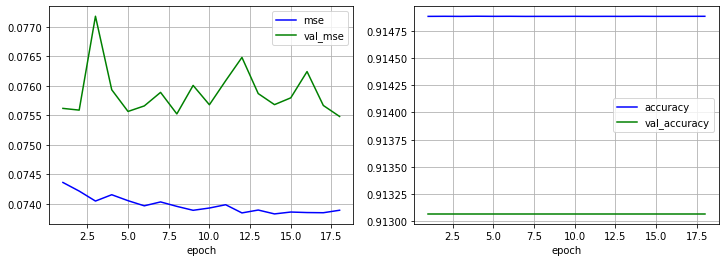

In [18]:
# Visualize trainning procces
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
hist.iloc[1:-1].plot(x='epoch', y=['mse','val_mse'],ax=ax1,marker="",color=['blue','green'])
plt.grid()
hist.iloc[1:-1].plot(x='epoch', y=['accuracy','val_accuracy'],ax=ax2,marker="",color=['blue','green'])
ax1.grid()
ax2.grid()
plt.show()


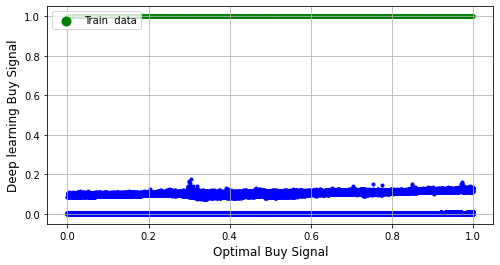

In [19]:
#Test the model vs trainning data and visualize
# Predict
y_predict_train=model.predict(x_train)
Y_train=y_train

# Visualize next_ex_rate vs ex_rate on a timeline
fig=plt.figure(figsize=(8,4))
plt.xlabel('Optimal Buy Signal', fontsize=12)
plt.ylabel('Deep learning Buy Signal', fontsize=12)

plt.scatter(x_train[:,0],y_train[:,0],marker=".",color='green')
plt.scatter(x_train[:,0], y_predict_train[:,0],marker=".",color='blue')

plt.legend(['Train  data'],loc="upper left",markerscale=3)
plt.grid()
plt.show()
#Store the figure into a file
#fig.savefig('figs/xxx.png')

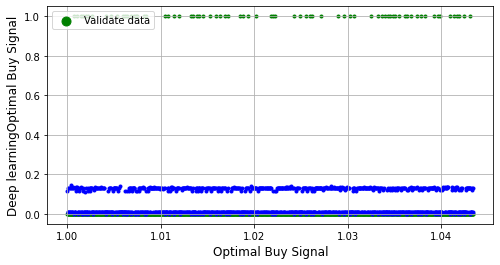

In [20]:
#Test the model vs validate data, estimate error, and visualize
# Predict
y_predict_validate=model.predict(x_validate)

# Visualize next_ex_rate vs ex_rate on a timeline
fig=plt.figure(figsize=(8,4))
plt.xlabel('Optimal Buy Signal', fontsize=12)
plt.ylabel('Deep learningOptimal Buy Signal', fontsize=12)

plt.scatter(x_validate[:,0],y_validate[:,0],marker=".",color='green')
plt.scatter(x_validate[:,0], y_predict_validate[:,0],marker=".",color='blue')
plt.legend(['Validate data'],loc="upper left",markerscale=3)
plt.grid()
plt.show()
#Store the figure into a file
#fig.savefig('figs/xxxg.png')

In [21]:
# Evaluate de model, and print the estimated model errors from testing
loss, val_mse, val_mae , accuracy = model.evaluate(x_validate,y_validate)

print('Validate data mean errors in GBP:')

mae_GBP= np.round(val_mae,2)
print('Mean average error:', mae_GBP)

mse_GBP =np.round(val_mse,2)
print('Mean squared error:', mse_GBP)

rmse_GBP =np.round(np.sqrt(val_mse),2)
print('Root mean squared error:', rmse_GBP)


1135/1135 [==============================] - 0s 40us/step


ValueError: not enough values to unpack (expected 4, got 3)

In [ ]:
# Visualize the error distribution.
# Reshape labels for comparison

y_validate=y_validate.reshape(validate_data_shape[0],1)
y_predict_validate=y_predict_validate.reshape(validate_data_shape[0],1)
error=y_predict_validate-y_validate

# Plot Histogram
fig=plt.figure(figsize=(8,4))
plt.ylabel('Density', fontsize=12)
plt.xlabel('Prediction error (GBP)', fontsize=12)

plt.hist(error,bins=16, density=True, alpha=0.4,color='red')

data = np.random.randn(validate_data_shape[0]*1000)*rmse_GBP
plt.hist(data,bins=1000,density=True,histtype='step',linewidth=1, color="blue");
plt.legend(['Normal dist. simu.','Predicted error'],loc="upper left",markerscale=3)
plt.grid()
plt.show()
#Store the figure into a file
#fig.savefig('figs/xxxx.png')


In [ ]:
# save the model
#dump(model, open('Test_Robot_128x64x1_adam.pkl', 'wb'))
# save the scaler
#dump(scaler, open('scaler_Test_Robot_128x64x1_adam.pkl', 'wb'))